<center>
<img src="./pict/matplotlib_logo.png">
<br />
<br />

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

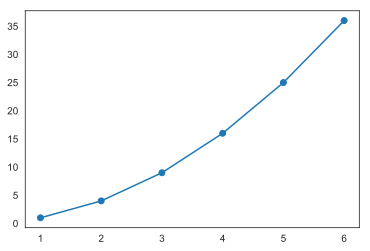

In [2]:
x = [1, 2, 3, 4, 5, 6]
y = [i ** 2 for i in x]

plt.plot(x, y, marker='o')

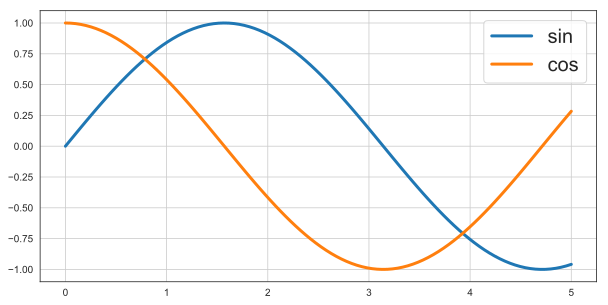

In [3]:
x = np.linspace(0, 5, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, np.sin(x), linewidth=3, label='sin')
plt.plot(x, np.cos(x), linewidth=3, label='cos')
plt.legend(loc='upper right', prop={'size':20})
plt.grid(True)
plt.show()

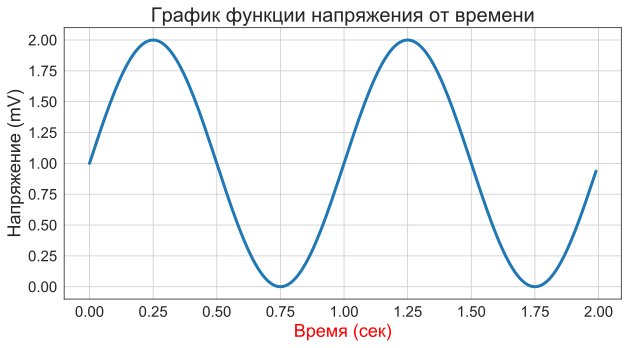

In [4]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

plt.figure(figsize=(10, 5))

plt.title('График функции напряжения от времени', fontsize=20)
plt.plot(t, s, linewidth=3)
plt.grid(True)
plt.xlabel('Время (сек)', color='red', fontsize=18)
plt.ylabel('Напряжение (mV)', fontsize=18)

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

plt.show()

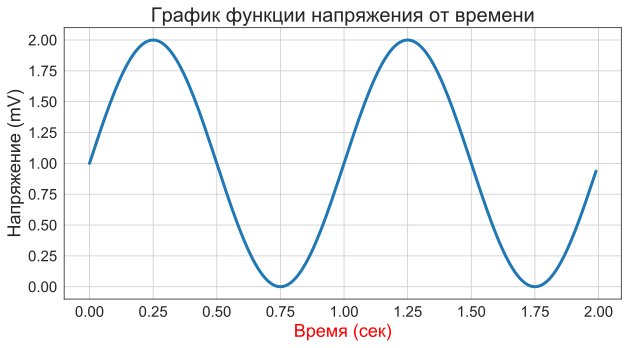

In [5]:
plt.figure(figsize=(10, 5))

ax = plt.gca()
ax.set_title('График функции напряжения от времени', fontsize=20)
ax.plot(t, s, linewidth=3)
ax.grid(True)
ax.set_xlabel('Время (сек)', color='red', fontsize=18)
ax.set_ylabel('Напряжение (mV)', fontsize=18)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

plt.show()

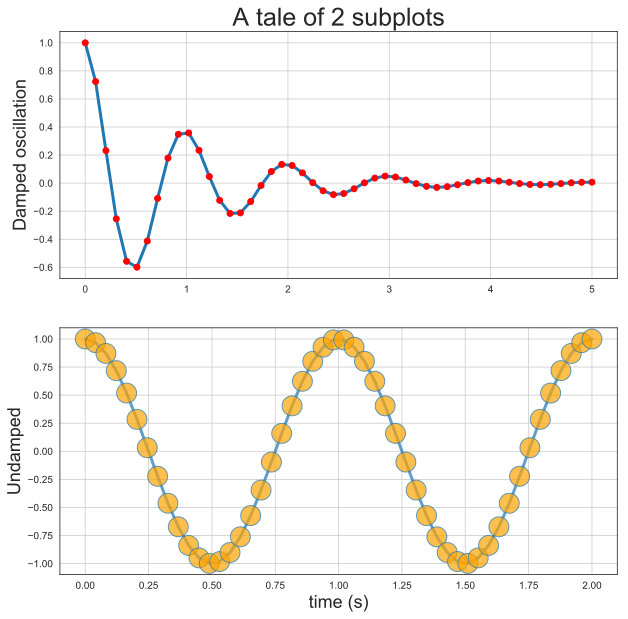

In [6]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(x1, y1, linewidth=3)
plt.plot(x1, y1, 'ro', linewidth=3)
plt.title('A tale of 2 subplots', fontsize=25)
plt.ylabel('Damped oscillation', fontsize=18)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '-o', ms=20, alpha=0.7, mfc='orange', linewidth=3)
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('Undamped', fontsize=18)
plt.grid(True)
plt.show()

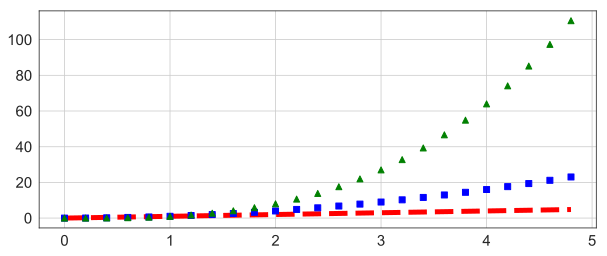

In [7]:
# полный список спецификаторов:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

t = np.arange(0., 5., 0.2)

plt.figure(figsize=(10, 4))
plt.plot(t, t, 'r--', linewidth=5)
plt.plot(t, t ** 2, 'bs',linewidth=5)
plt.plot(t, t ** 3, 'g^', linewidth=5)
plt.grid(True)

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    
    
plt.show()

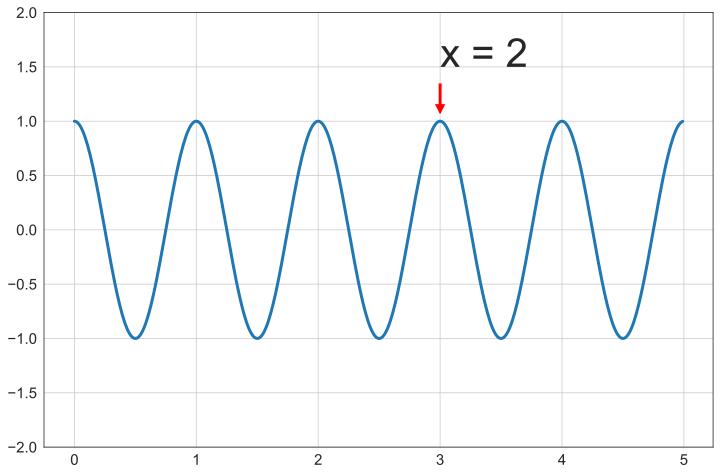

In [8]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)

plt.figure(figsize=(12, 8))
plt.plot(t, s, lw=3)
plt.annotate('x = 2', xy=(3, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='red', shrink=0.12), size=40)
plt.ylim(-2,2)

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    
plt.grid(True)
plt.show()

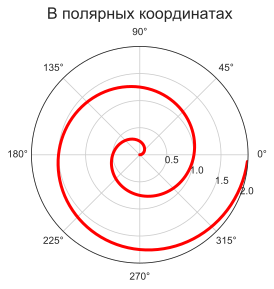

In [9]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
plt.title('В полярных координатах', y=1.1, fontsize=16)
ax.plot(theta, r, linewidth=3, color='red')
ax.set_rmax(1)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
plt.show()

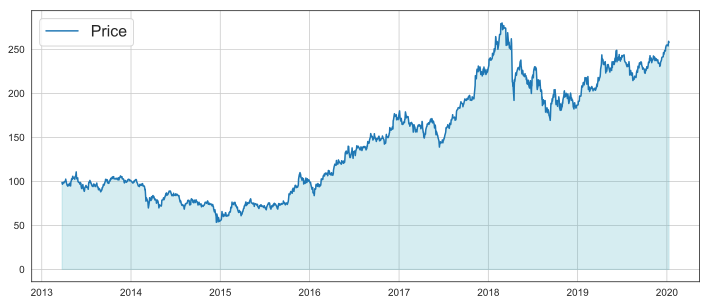

In [13]:
ts = pd.read_csv('./data/sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
ts = ts.CLOSE

plt.figure(figsize=(12, 5))
plt.plot(ts, label='Price')
plt.fill_between(ts.index, ts, color='#34a6ba', alpha=0.2)
plt.legend(prop={'size': 16})
plt.grid(True)
#plt.xlim('2014', '2016') # умный индекс
plt.show()

In [55]:
a = ts.values
Z = np.tile(a, (10, 1))

fig = plt.figure(figsize=(14, 5))
сs = plt.pcolor(Z, cmap='RdBu') # https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html
fig.colorbar(сs)
plt.show()

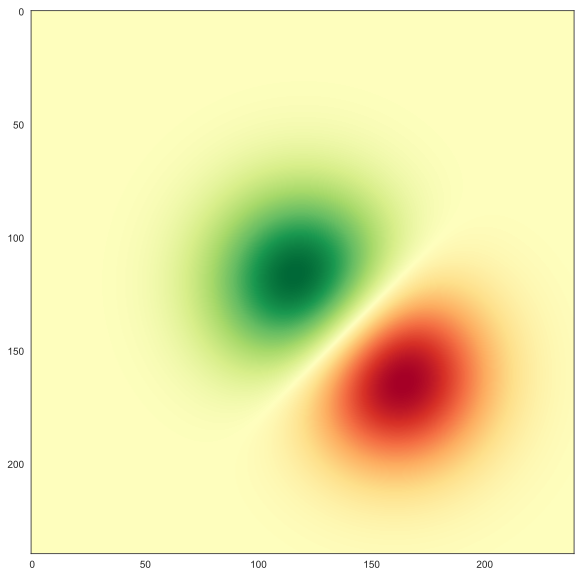

In [60]:
import matplotlib.cm as cm

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)

# узнать что делает meshgird
# plt.figure(figsize=(20, 20))
# plt.plot(X,Y, marker='.', color='k', linestyle='none')
# plt.show()

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# разные методы интерполяции
# https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html

plt.figure(figsize=(20, 10))
ax = plt.gca()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn)
plt.show()

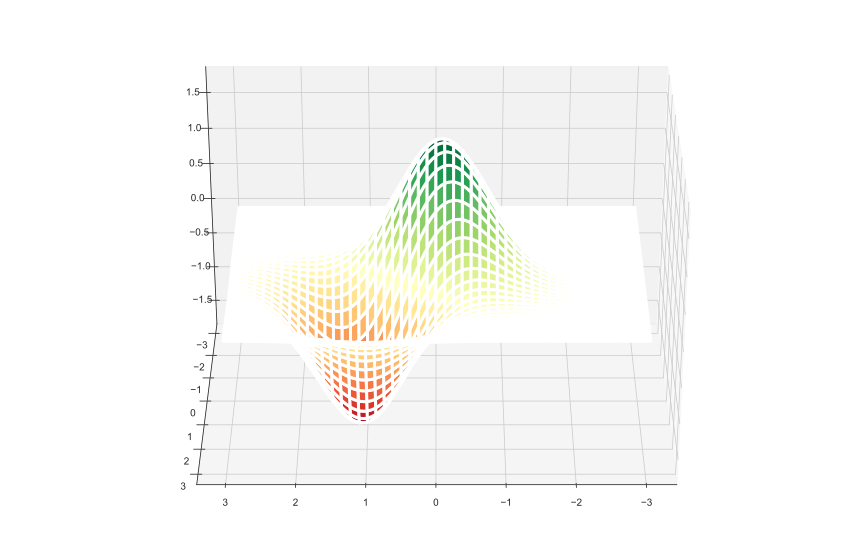

In [75]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.RdYlGn, linewidth=3)
angle = 90
ax.view_init(30, angle)
plt.show()

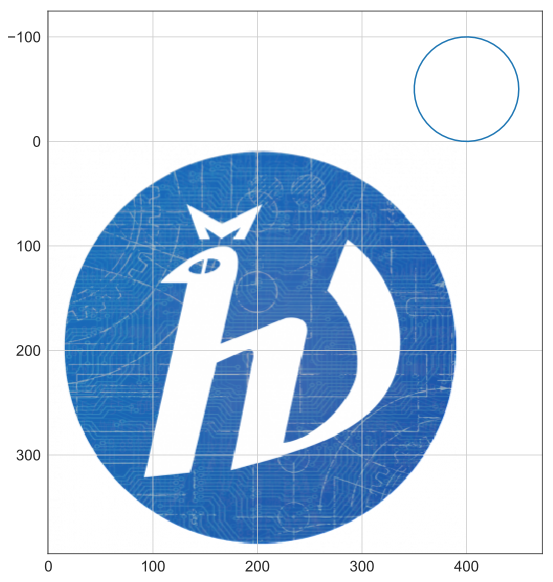

In [77]:
im = plt.imread("./pict/mipt_logo.png")
plt.figure(figsize=(20, 10))
implot = plt.imshow(im, cmap='hot')

theta = np.linspace(0, 2 * np.pi, 50)
z = np.cos(theta) * 50 + 400
t = np.sin(theta) * 50 - 50
plt.plot(z, t)

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

plt.grid(True)
plt.show()

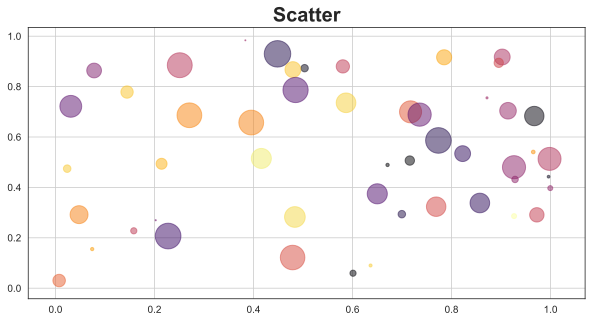

In [78]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2 

plt.figure(figsize=(10, 5))
plt.title('Scatter', fontweight='bold',  fontsize=20)
plt.scatter(x, y, s=area, c=colors, cmap='inferno', alpha=0.5) 
plt.grid(True)
plt.show()

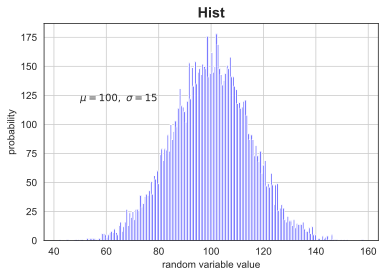

In [93]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

plt.title('Hist', fontweight='bold', fontsize='x-large')
plt.hist(x, bins=200, facecolor='b')

plt.xlabel('random variable value')
plt.ylabel('probability')
plt.text(50, 120, r'$\mu=100,\ \sigma=15$')
plt.grid(True)
plt.show()


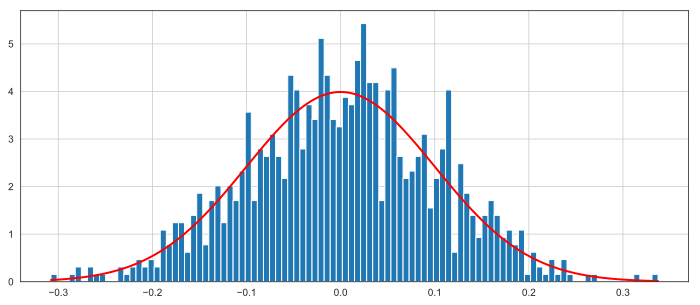

In [95]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

plt.figure(figsize=(12, 5))
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.grid(True)
plt.show()

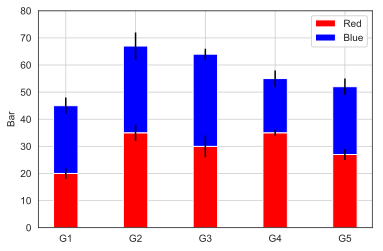

In [99]:
N = 5
red = (20, 35, 30, 35, 27)
blue = (25, 32, 34, 20, 25)
red_sdt = (2, 3, 4, 1, 2)
blue_std = (3, 5, 2, 3, 3)
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, red, width, color='r', yerr=red_sdt) # можно и горизонтальную - plt.barh
p2 = plt.bar(ind, blue, width, color='b', bottom=red, yerr=blue_std)

plt.ylabel('Bar')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Red', 'Blue'))
plt.grid(True)
plt.show()

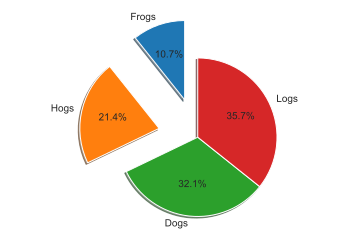

In [102]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 50]
explode = (0.5, 0.5, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

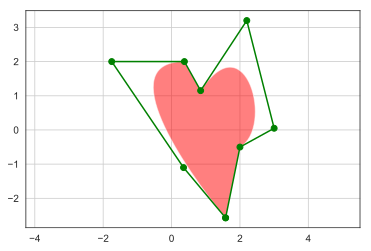

In [103]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()